In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [264]:
data = pd.read_csv('winequality-red.csv')
#data.drop(columns=['Id'], inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [184]:
data.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [185]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [266]:
data.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)

In [187]:
columns = list(data.columns)

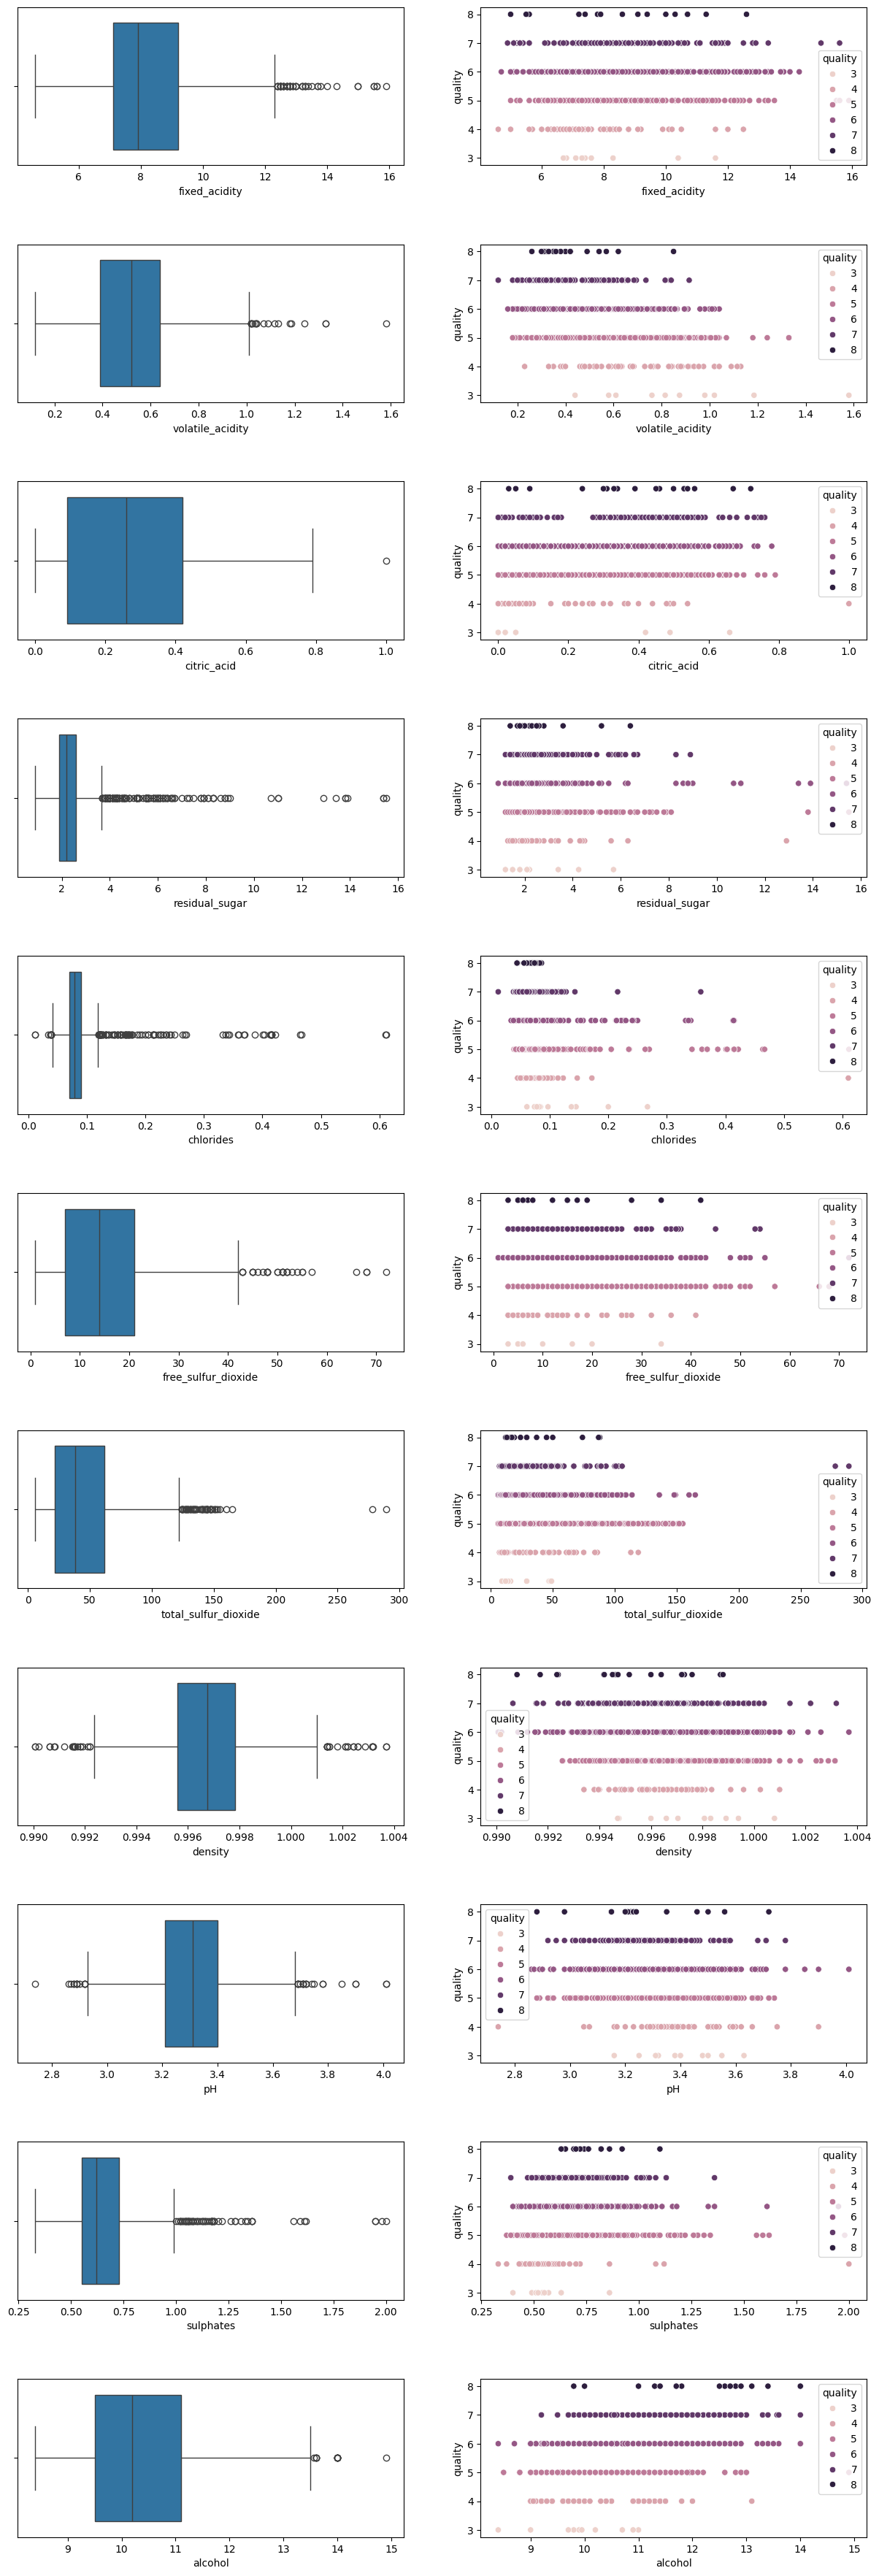

In [188]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    sns.boxplot(x=columns[i], data=data, ax=ax[i, 0])
    sns.scatterplot(x=columns[i], y='quality', data=data, hue='quality', ax=ax[i, 1])

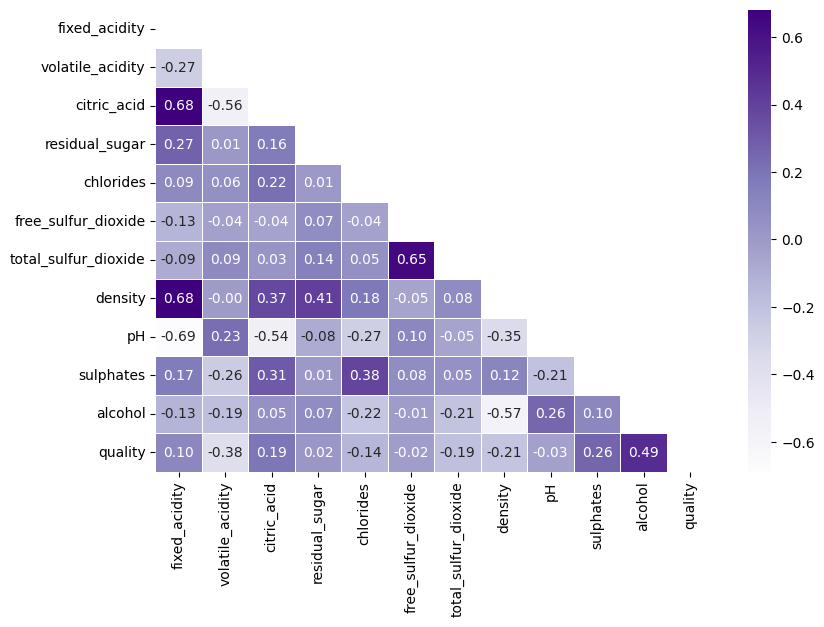

In [234]:
corr = data.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

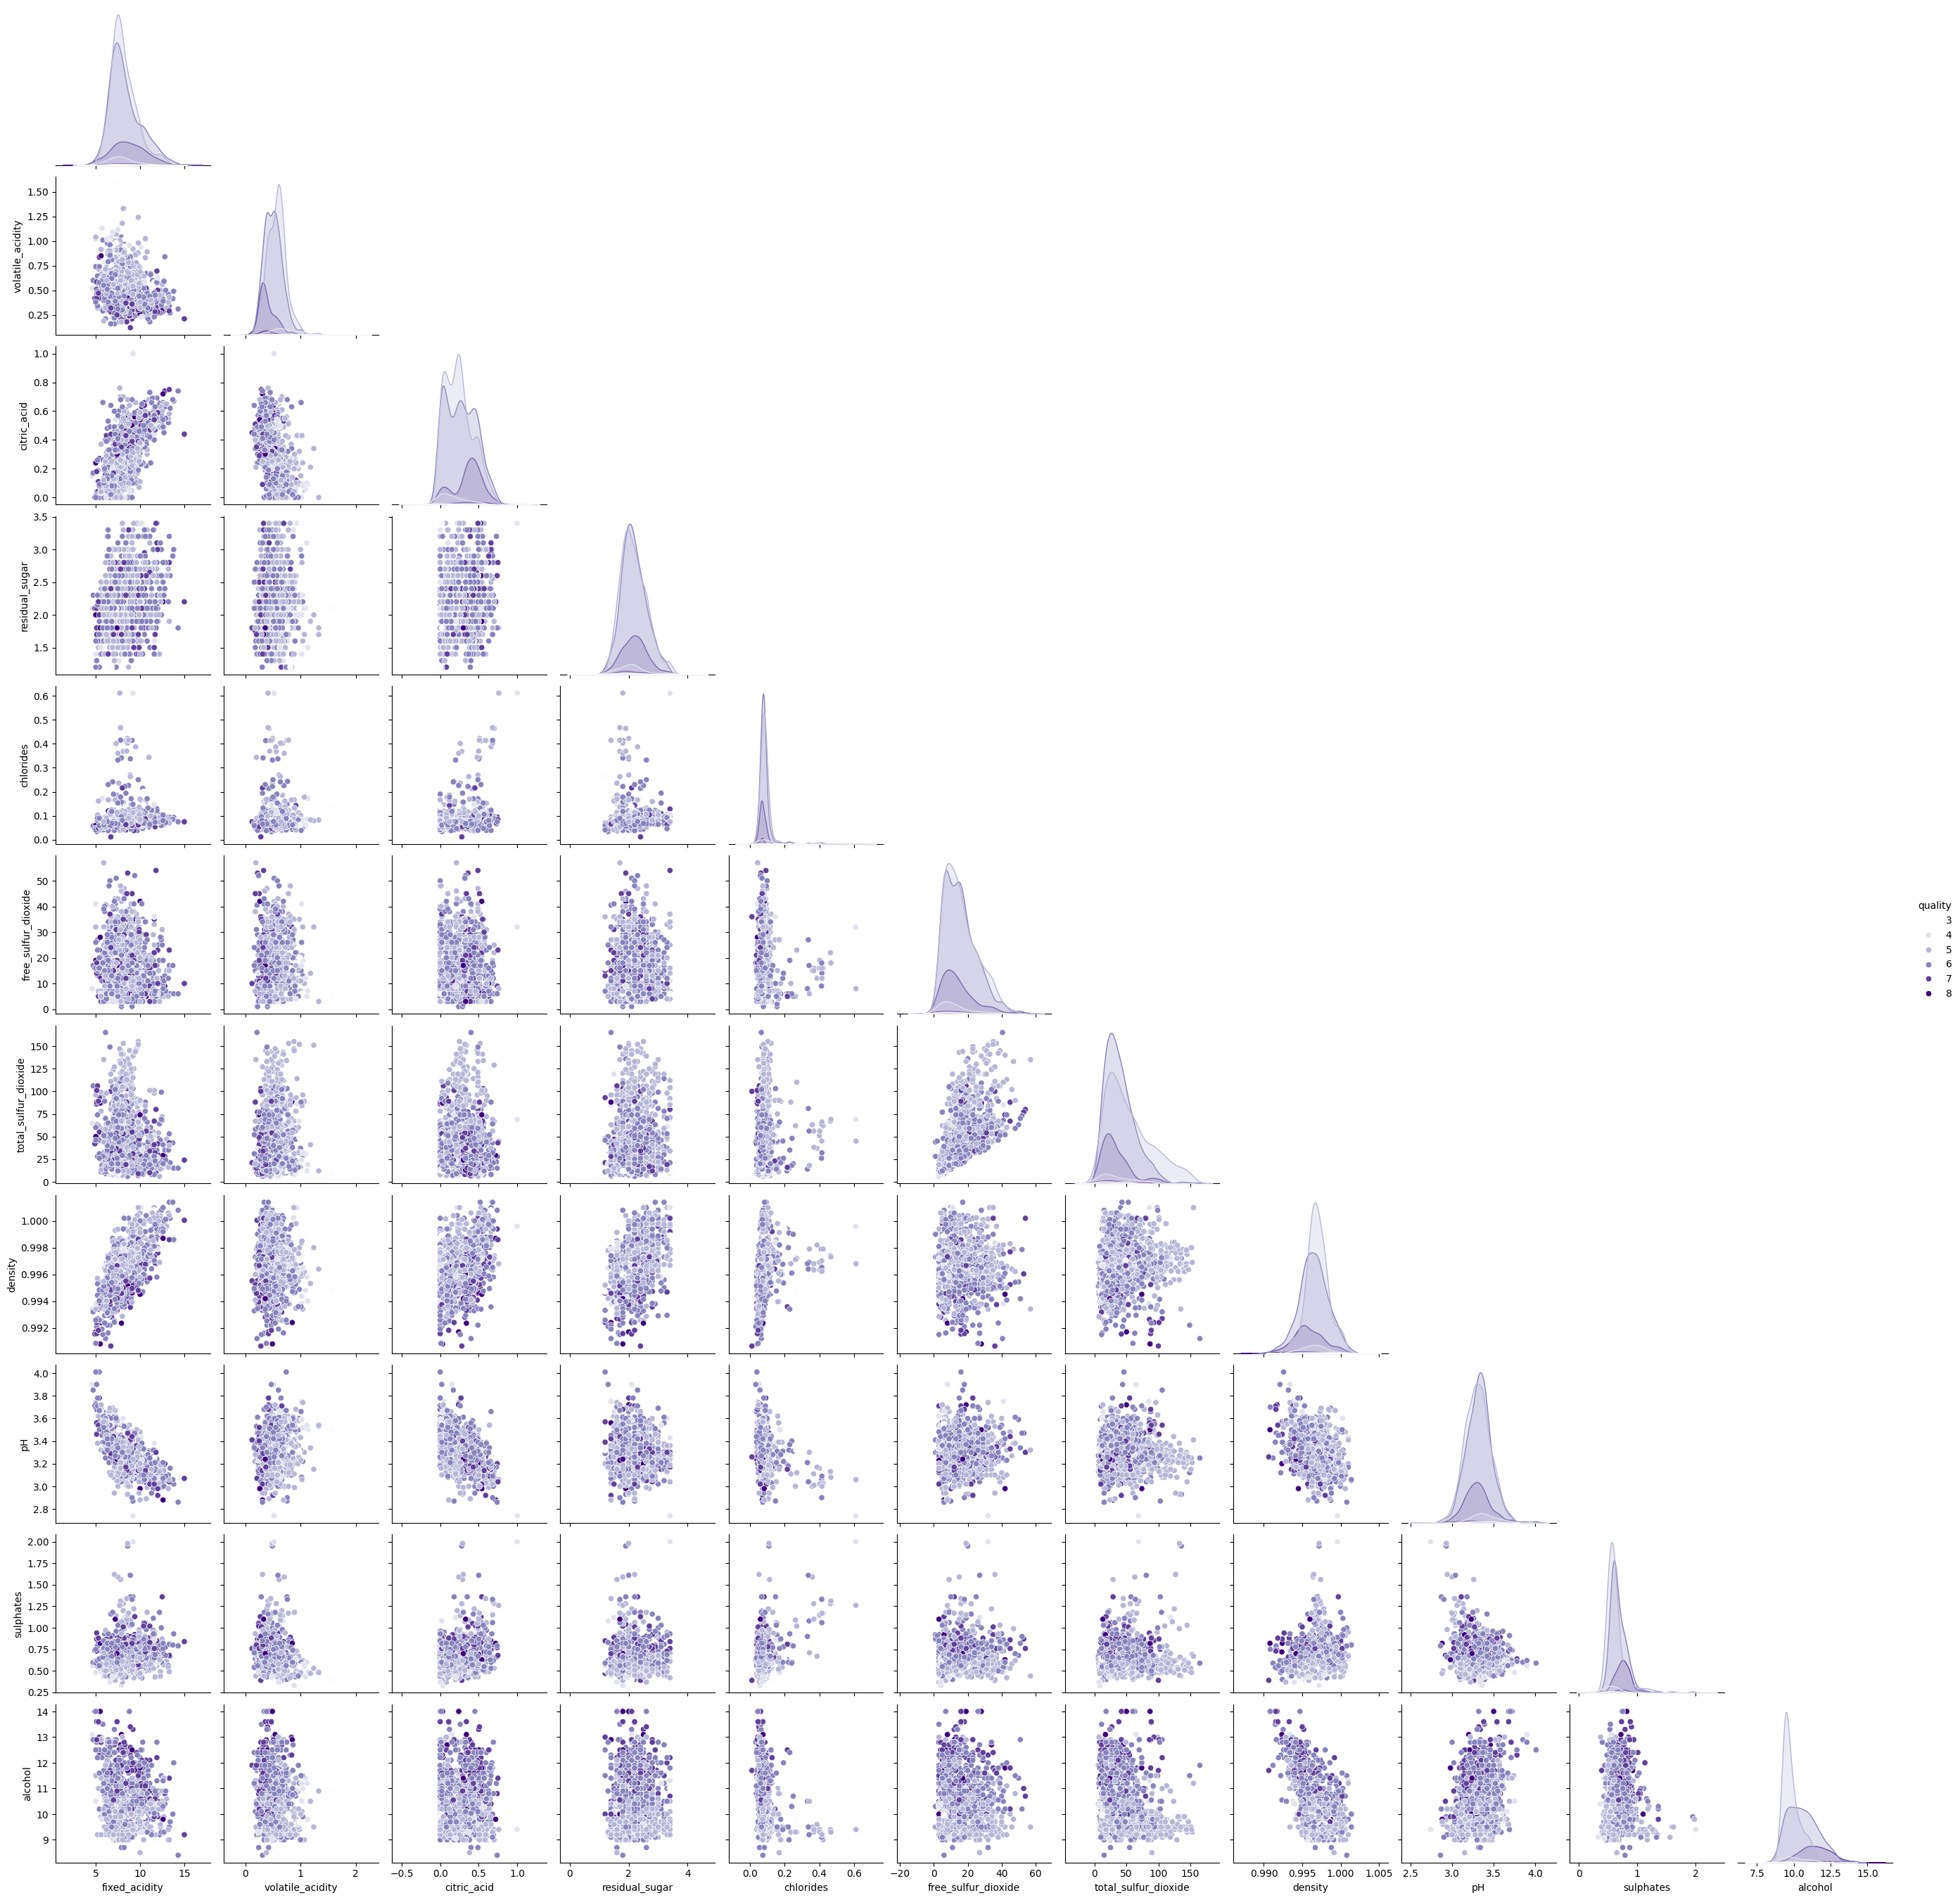

In [235]:
sns.pairplot(data, hue='quality', corner = True, palette='Purples')

In [236]:
target_value_counts = data['quality'].value_counts()
print(target_value_counts)

quality
5    612
6    585
7    166
4     44
8     15
3      8
Name: count, dtype: int64


In [237]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [238]:
#data = data.replace({'quality' : {
                                    #8 : 'Good',
                                    #7 : 'Good',
                                    #6 : 'Middle',
                                    #5 : 'Middle',
                                    #4 : 'Bad',
                                    #3 : 'Bad',
        #}}
#)

In [239]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [267]:
X_temp = data.drop(columns='quality')
y = data.quality

In [268]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.000000,0.329171,0.154079,0.000000,0.221239,0.292035,0.407080,1.000000
volatile_acidity,1599.000000,0.279329,0.122644,0.000000,0.184932,0.273973,0.356164,1.000000
citric_acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual_sugar,1599.000000,0.112247,0.096570,0.000000,0.068493,0.089041,0.116438,1.000000
chlorides,1599.000000,0.125988,0.078573,0.000000,0.096828,0.111853,0.130217,1.000000
free_sulfur_dioxide,1599.000000,0.209506,0.147326,0.000000,0.084507,0.183099,0.281690,1.000000
total_sulfur_dioxide,1599.000000,0.142996,0.116238,0.000000,0.056537,0.113074,0.197880,1.000000
density,1599.000000,0.490211,0.138571,0.000000,0.406021,0.490455,0.570117,1.000000
pH,1599.000000,0.449695,0.121564,0.000000,0.370079,0.448819,0.519685,1.000000
sulphates,1599.000000,0.196496,0.101501,0.000000,0.131737,0.173653,0.239521,1.000000


In [242]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.269231,0.397260,0.00,0.318182,0.106845,0.178571,0.176101,0.665428,0.606299,0.137725,0.178571
1,0.307692,0.520548,0.00,0.636364,0.143573,0.428571,0.383648,0.572491,0.362205,0.209581,0.250000
2,0.307692,0.438356,0.04,0.500000,0.133556,0.250000,0.301887,0.591078,0.409449,0.191617,0.250000
3,0.634615,0.109589,0.56,0.318182,0.105175,0.285714,0.339623,0.684015,0.330709,0.149701,0.250000
4,0.269231,0.397260,0.00,0.318182,0.106845,0.178571,0.176101,0.665428,0.606299,0.137725,0.178571


In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [308]:
def count_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)  # Первый квартиль
        Q3 = df[column].quantile(0.75)  # Третий квартиль
        IQR = Q3 - Q1                   # Межквартильный размах
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    
    return outliers

outliers_count = count_outliers(X_train)
print(outliers_count)

{'fixed_acidity': np.int64(39), 'volatile_acidity': np.int64(18), 'citric_acid': np.int64(1), 'residual_sugar': np.int64(129), 'chlorides': np.int64(90), 'free_sulfur_dioxide': np.int64(21), 'total_sulfur_dioxide': np.int64(43), 'density': np.int64(34), 'pH': np.int64(27), 'sulphates': np.int64(50), 'alcohol': np.int64(10)}


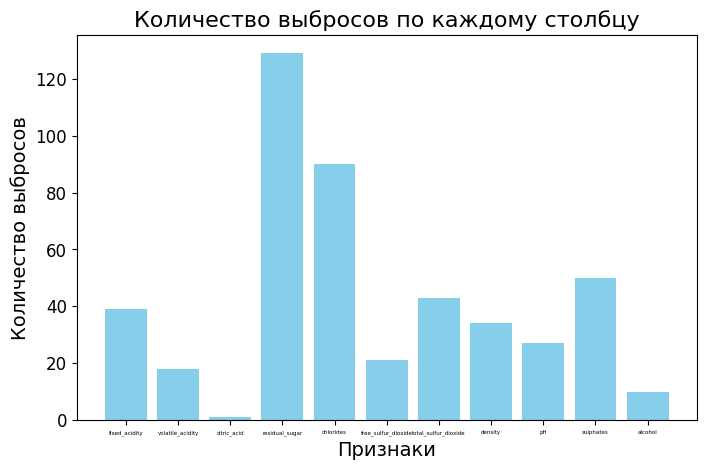

In [309]:
features = list(outliers_count.keys())
counts = list(outliers_count.values())

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
plt.bar(features, counts, color='skyblue')

# Настройка графика
plt.title('Количество выбросов по каждому столбцу', fontsize=16)
plt.xlabel('Признаки', fontsize=14)
plt.ylabel('Количество выбросов', fontsize=14)
plt.xticks(fontsize=4)
plt.yticks(fontsize=12)

# Показ графика
plt.show()

In [310]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1279 entries, 493 to 1126
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1279 non-null   float64
 1   volatile_acidity      1279 non-null   float64
 2   citric_acid           1279 non-null   float64
 3   residual_sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free_sulfur_dioxide   1279 non-null   float64
 6   total_sulfur_dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB
None


In [311]:
def remove_outliers(X, y):
    X_cleaned = X.copy()
    y_cleaned = y.copy()
    
    for column in X_cleaned.columns:
        Q1 = X_cleaned[column].quantile(0.25)
        Q3 = X_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (X_cleaned[column] >= lower_bound) & (X_cleaned[column] <= upper_bound)
        X_cleaned = X_cleaned[mask]
        y_cleaned = y_cleaned[mask]
    
    return X_cleaned, y_cleaned

X_train, y_train = remove_outliers(X_train, y_train)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 493 to 1459
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         900 non-null    float64
 1   volatile_acidity      900 non-null    float64
 2   citric_acid           900 non-null    float64
 3   residual_sugar        900 non-null    float64
 4   chlorides             900 non-null    float64
 5   free_sulfur_dioxide   900 non-null    float64
 6   total_sulfur_dioxide  900 non-null    float64
 7   density               900 non-null    float64
 8   pH                    900 non-null    float64
 9   sulphates             900 non-null    float64
 10  alcohol               900 non-null    float64
dtypes: float64(11)
memory usage: 84.4 KB
None


In [329]:
target_value_counts = y_train.value_counts()
print(target_value_counts)

quality
5    393
6    375
7     99
4     24
8      8
3      1
Name: count, dtype: int64


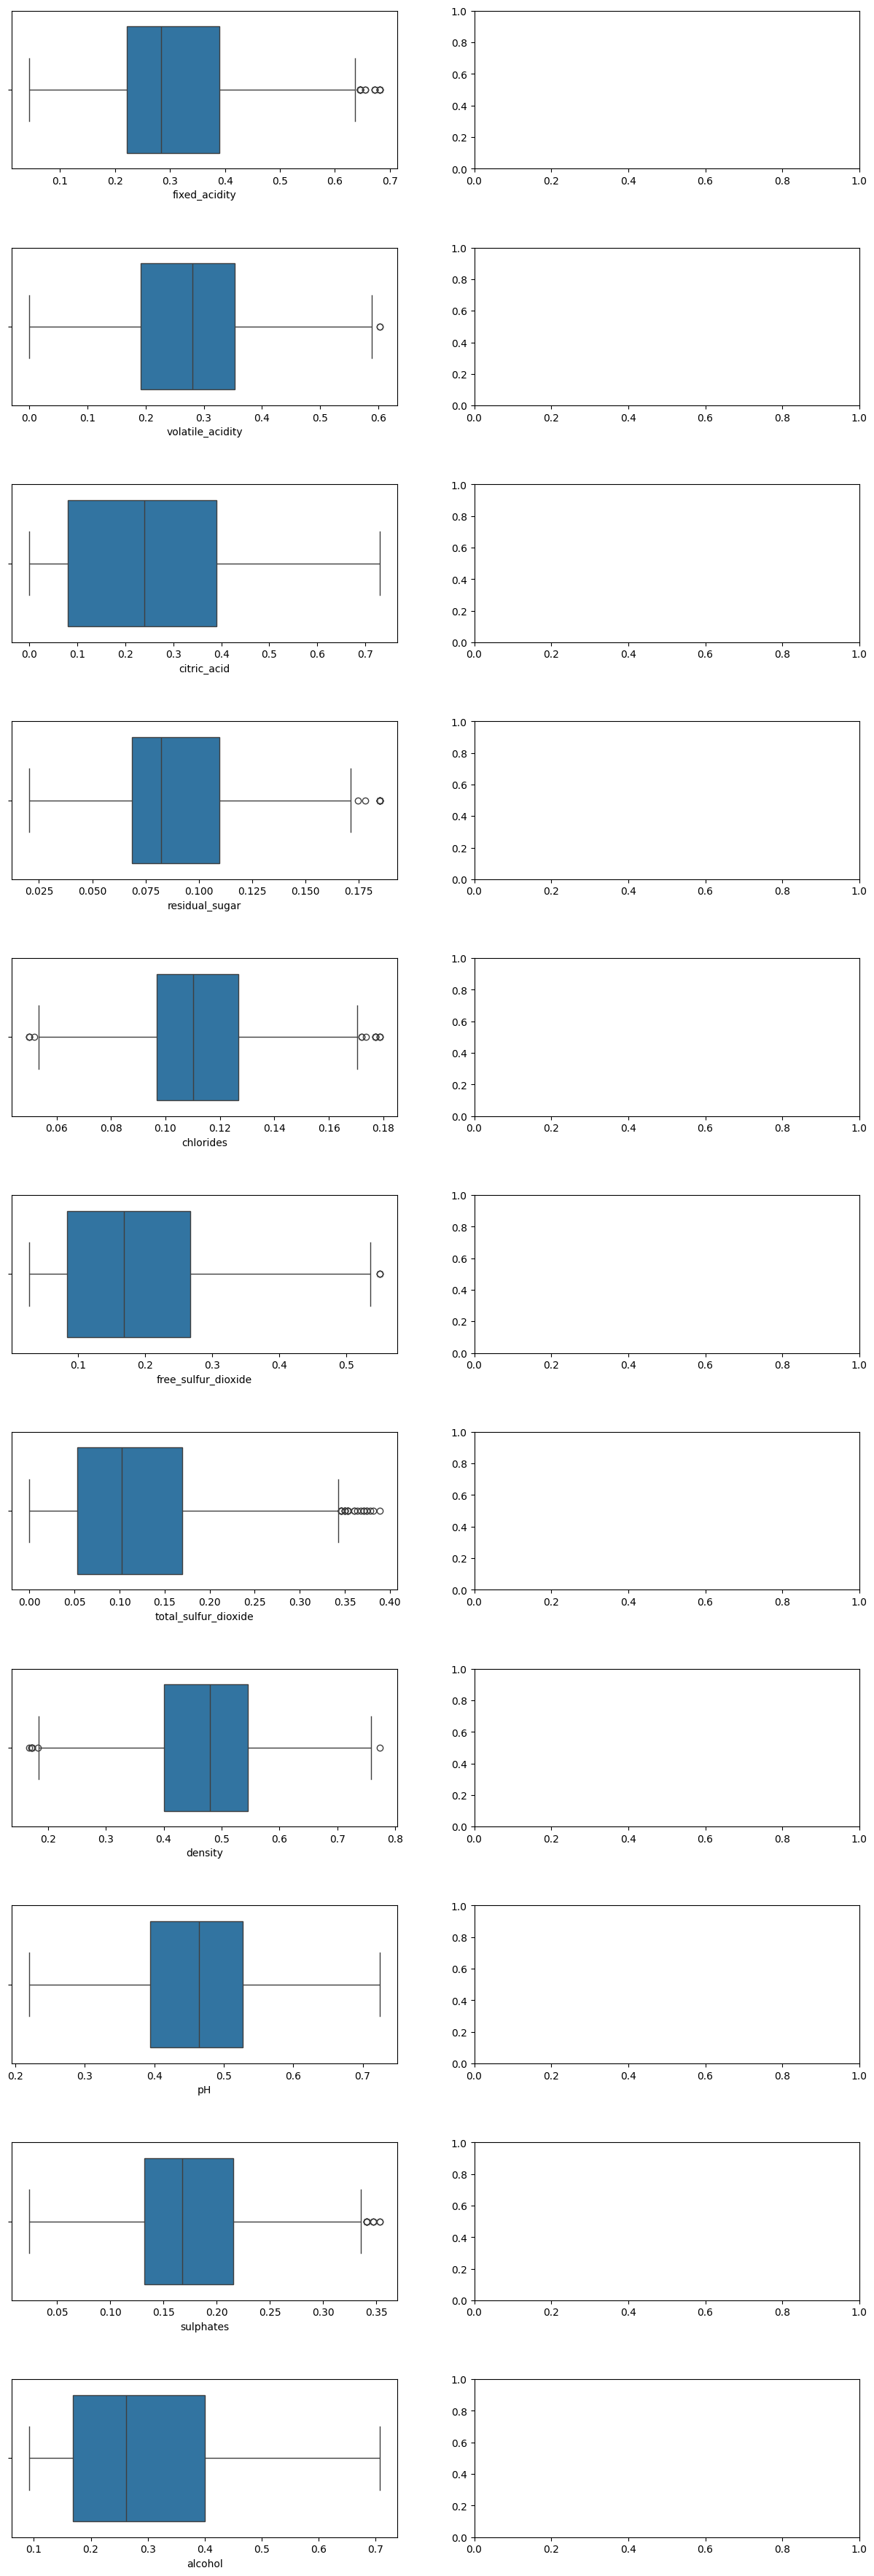

In [312]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    sns.boxplot(x=columns[i], data=X_train, ax=ax[i, 0])

In [313]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

LogisticRegression()

In [314]:
y_pred = logisticRegression.predict(X_test)

In [315]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ',recall)
print('F1: ',f1)

Accuracy:  0.55625
Precision:  0.4961665372670808
Recall:  0.55625
F1:  0.5158969349296088


In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [317]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)

LinearRegression()

In [318]:
y_pred = linearRegression.predict(X_test)

In [319]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse: ', mse)
print('mae: ', mae)
print('r2: ', r2)

mse:  0.40085194543121005
mae:  0.5098924627154876
r2:  0.3866130813049222


In [320]:
from math import ceil

In [321]:
y_pred = [ceil(y) for y in y_pred]

In [322]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted') 

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ',recall)
print('F1: ',f1)

Accuracy:  0.396875
Precision:  0.4801523269368723
Recall:  0.396875
F1:  0.3282312870316492


In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.63


In [325]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")


Accuracy for each fold: [0.525      0.5875     0.55625    0.51875    0.6        0.5625
 0.59375    0.5875     0.59375    0.58490566]
Mean Accuracy: 0.57


In [327]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.2f}")

best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


A:\USER_ONLY\Programs\Python\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'bootstrap': False, 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 179}
Best Cross-Validation Accuracy: 0.70
Test Accuracy: 0.62


In [335]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train = X_train[y_train!=3]
y_train = y_train[y_train!=3]
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

target_value_counts = y_train_res.value_counts()
print(target_value_counts)

quality
6    393
5    393
7    393
4    393
8    393
Name: count, dtype: int64


In [334]:
param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_res, y_train_res)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.2f}")

best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'bootstrap': False, 'max_depth': 22, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 211}
Best Cross-Validation Accuracy: 0.87
Test Accuracy: 0.62
